## Sastaticket Datathon Assignment
## Project: Flight Price Prediction
## Submitted By: Jackay Lohana

### Importing libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading datasets

In [8]:
# reading data
df_x=pd.read_csv("X_train.csv")
df_y=pd.read_csv("y_train.csv")

In [3]:
# checking shape of data
df_x.shape, df_y.shape, df_test

((21776590, 11), (21776590, 2))

1. Y dataset has almost 5 times more rows than that of X dataset.
2.  X dataset has 10 columns whereas Y dataset has 2 columns.
3.  Now, we will concocate these two datasets into one dataset and take only target column from y dataset.


In [4]:
df_x.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69


In [5]:
df_y.head()

,Unnamed: 0,target
0,0,7400.0
1,1,8650.0
2,2,9150.0
3,3,10400.0
4,4,8697.0


In [9]:
# Removing unnamaed columns from both train datasets
#df_x = df_x.drop(['Unnamed'])
#df_x.shape

In [5]:
# Concocating x and y dataset into one dataset, also taking only target column adn dropping unnamed column from y_train dataset.
df = pd.concat([df_x, df_y["target"]], axis=1)
df.shape

(21776590, 12)

Now we have one dataset df containing x and y data, we will perform Exploratory Data Analysis (EDA) on it.

### Exploratory Data Analysis

In [6]:
# checking the usage of memory by dataset
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21776590 entries, 0 to 21776589
Columns: 12 entries, Unnamed: 0 to target
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 10.6 GB


The original dataset has memory usage of 10.6 GB. We have to perform memory optimization on this dataset.

In [7]:
# checking null values in dataset df
df.isnull().sum()

Unnamed: 0    0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
target        0
dtype: int64

There are no null values in our dataset.

In [10]:
# finding duplicates
df[df.duplicated()]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
1188659,2021-09-08 05:51:56.871081+00:00,x,y,2021-09-30 05:30:00+00:00,2021-09-30 07:30:00+00:00,gamma,True,20.0,2.0,c-2,9405.0
2447951,2021-09-15 05:04:55.799156+00:00,x,y,2021-11-01 10:35:00+00:00,2021-11-01 12:35:00+00:00,omega,True,20.0,1.0,d-3,8890.0
2447952,2021-09-15 05:04:55.799156+00:00,x,y,2021-11-01 04:40:00+00:00,2021-11-01 06:40:00+00:00,omega,True,20.0,1.0,d-1,7390.0
2447997,2021-09-15 05:06:46.957085+00:00,x,y,2021-10-20 10:35:00+00:00,2021-10-20 12:35:00+00:00,omega,True,20.0,1.0,d-3,7390.0
2447998,2021-09-15 05:06:46.957085+00:00,x,y,2021-10-20 17:05:00+00:00,2021-10-20 19:05:00+00:00,omega,True,20.0,1.0,d-5,8890.0
...,...,...,...,...,...,...,...,...,...,...,...
4475512,2021-09-29 12:03:01.509481+00:00,x,y,2021-10-09 17:05:00+00:00,2021-10-09 19:05:00+00:00,omega,True,20.0,1.0,d-5,8605.0
4475567,2021-09-29 12:03:27.379866+00:00,x,y,2021-10-22 10:50:00+00:00,2021-10-22 12:50:00+00:00,omega,True,20.0,1.0,d-3,8605.0
4475569,2021-09-29 12:03:27.379866+00:00,x,y,2021-10-22 17:05:00+00:00,2021-10-22 19:05:00+00:00,omega,True,20.0,1.0,d-5,7884.0
4475644,2021-09-29 12:03:48.831055+00:00,x,y,2021-10-24 17:05:00+00:00,2021-10-24 19:05:00+00:00,omega,True,20.0,1.0,d-5,7884.0


In [11]:
# dropping duplicates
df.drop_duplicates(keep="first", inplace= True)
df[df.duplicated()]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target


In [12]:
# finding unique values in columns
df.nunique()

f1        897719
f2             1
f3             1
f4          3134
f5          3339
f6             4
f7             1
f8             4
f9             3
f10           19
target       753
dtype: int64

In [13]:
# dropping irrelevant columns
df = df.drop(['f2','f3','f7','f10'], axis=1) 

In [14]:
df.head()

,f1,f4,f5,f6,f8,f9,target
0,2021-09-01 08:30:19.320999+00:00,2021-09-08 11:00:00+00:00,2021-09-08 12:55:00+00:00,beta,40.0,0.0,7400.0
1,2021-09-01 08:30:19.320999+00:00,2021-09-08 14:00:00+00:00,2021-09-08 15:55:00+00:00,beta,40.0,0.0,8650.0
2,2021-09-01 08:30:19.320999+00:00,2021-09-08 05:00:00+00:00,2021-09-08 06:55:00+00:00,beta,20.0,0.0,9150.0
3,2021-09-01 08:30:20.396761+00:00,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,20.0,2.0,10400.0
4,2021-09-01 08:30:20.396761+00:00,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,20.0,1.0,8697.0


In [15]:
# checking the usage of memory by dataset
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4515741 entries, 0 to 4532488
Columns: 7 entries, f1 to target
dtypes: float64(3), object(4)
memory usage: 1.5 GB


We removed duplicates and irrelevant columns, now the memory usage is 1.5 GB.

In [16]:
# Checking memeroy usage of different columnms
df.memory_usage(index=False, deep=True)

f1        401900949
f4        370290762
f5        370290762
f6        279255618
f8         36125928
f9         36125928
target     36125928
dtype: int64

In [17]:
# checking datatypes of different columns in dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4515741 entries, 0 to 4532488
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   f1      object 
 1   f4      object 
 2   f5      object 
 3   f6      object 
 4   f8      float64
 5   f9      float64
 6   target  float64
dtypes: float64(3), object(4)
memory usage: 275.6+ MB


In [18]:
# describing numerical columns.
df.describe()

,f8,f9,target
count,4.515741e+06,4.515741e+06,4.515741e+06
mean,2.202416e+01,9.890705e-01,9.973305e+03
std,7.752096e+00,5.549678e-01,1.891602e+03
min,0.000000e+00,0.000000e+00,6.881000e+03
25%,2.000000e+01,1.000000e+00,8.739000e+03
50%,2.000000e+01,1.000000e+00,9.798000e+03
75%,2.000000e+01,1.000000e+00,1.079900e+04
max,4.000000e+01,2.000000e+00,3.358500e+04


As can be seen, the f8, f9 and target columns are assigned float64 datatype, however their values can be represented by only int8 or int16 datatype. So let's assign proper datatypes to them.

In [19]:
# using dictionary to convert specific columns datatype.
convert_dict = {'f8': 'int8',
                'f9': 'int8',
                'target':'int16'
               }
  
df = df.astype(convert_dict)
print(df.dtypes)

f1        object
f4        object
f5        object
f6        object
f8          int8
f9          int8
target     int16
dtype: object


In [20]:
# Checking memeroy usage of different columnms now
df.memory_usage(index=False, deep=True)

f1        401900949
f4        370290762
f5        370290762
f6        279255618
f8          4515741
f9          4515741
target      9031482
dtype: int64

In [21]:
# checking the usage of memory by dataset
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4515741 entries, 0 to 4532488
Columns: 7 entries, f1 to target
dtypes: int16(1), int8(2), object(4)
memory usage: 1.4 GB


In [22]:
df.head()

,f1,f4,f5,f6,f8,f9,target
0,2021-09-01 08:30:19.320999+00:00,2021-09-08 11:00:00+00:00,2021-09-08 12:55:00+00:00,beta,40,0,7400
1,2021-09-01 08:30:19.320999+00:00,2021-09-08 14:00:00+00:00,2021-09-08 15:55:00+00:00,beta,40,0,8650
2,2021-09-01 08:30:19.320999+00:00,2021-09-08 05:00:00+00:00,2021-09-08 06:55:00+00:00,beta,20,0,9150
3,2021-09-01 08:30:20.396761+00:00,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,20,2,10400
4,2021-09-01 08:30:20.396761+00:00,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,20,1,8697


In [23]:
#ns.barplot(data = df ,x = 'target', alpha = 1, color='Navy', bins = 10, binwidth = 10)

# Feature Engineering

Exctracting featurs from f1, f4 and f5

In [24]:
# Extracting features from f1 ticket purchase date and time:
df["ticket_pday"] = pd.to_datetime(df.f1).dt.day
df["ticket_pmonth"] = pd.to_datetime(df.f1).dt.month
df["ticket_pyear"] = pd.to_datetime(df.f1).dt.year
df["ticket_phour"] = pd.to_datetime(df.f1).dt.hour
df["ticket_pmin"] = pd.to_datetime(df.f1).dt.minute

# Extracting features from f4 date of journey
df["journey_day"] = pd.to_datetime(df.f4).dt.day
df["journey_month"] = pd.to_datetime(df.f4).dt.month
df["journey_year"] = pd.to_datetime(df.f4).dt.year

# Extracting features from f4 date of departure
df["departure_hour"] = pd.to_datetime(df.f4).dt.hour
df["departure_min"] = pd.to_datetime(df.f4).dt.minute

# Extracting features from f5 date of arrival
df["arrival_hour"] = pd.to_datetime(df.f5).dt.hour
df["arrival_min"] = pd.to_datetime(df.f5).dt.minute

df.head()

,f1,f4,f5,f6,f8,f9,target,ticket_pday,ticket_pmonth,ticket_pyear,ticket_phour,ticket_pmin,journey_day,journey_month,journey_year,departure_hour,departure_min,arrival_hour,arrival_min
0,2021-09-01 08:30:19.320999+00:00,2021-09-08 11:00:00+00:00,2021-09-08 12:55:00+00:00,beta,40,0,7400,1,9,2021,8,30,8,9,2021,11,0,12,55
1,2021-09-01 08:30:19.320999+00:00,2021-09-08 14:00:00+00:00,2021-09-08 15:55:00+00:00,beta,40,0,8650,1,9,2021,8,30,8,9,2021,14,0,15,55
2,2021-09-01 08:30:19.320999+00:00,2021-09-08 05:00:00+00:00,2021-09-08 06:55:00+00:00,beta,20,0,9150,1,9,2021,8,30,8,9,2021,5,0,6,55
3,2021-09-01 08:30:20.396761+00:00,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,20,2,10400,1,9,2021,8,30,8,9,2021,5,30,7,30
4,2021-09-01 08:30:20.396761+00:00,2021-09-08 05:30:00+00:00,2021-09-08 07:30:00+00:00,gamma,20,1,8697,1,9,2021,8,30,8,9,2021,5,30,7,30


In [25]:
# dropping columns f1, f4 and f5 from which features were extracted
df=df.drop(['f1','f4','f5'], axis=1)
df.head()

,f6,f8,f9,target,ticket_pday,ticket_pmonth,ticket_pyear,ticket_phour,ticket_pmin,journey_day,journey_month,journey_year,departure_hour,departure_min,arrival_hour,arrival_min
0,beta,40,0,7400,1,9,2021,8,30,8,9,2021,11,0,12,55
1,beta,40,0,8650,1,9,2021,8,30,8,9,2021,14,0,15,55
2,beta,20,0,9150,1,9,2021,8,30,8,9,2021,5,0,6,55
3,gamma,20,2,10400,1,9,2021,8,30,8,9,2021,5,30,7,30
4,gamma,20,1,8697,1,9,2021,8,30,8,9,2021,5,30,7,30


 Handling Categorical Data

In [26]:
# checking value counts of respective airlines.
df['f6'].value_counts()

alpha    1715259
gamma    1341926
omega     738232
beta      720324
Name: f6, dtype: int64

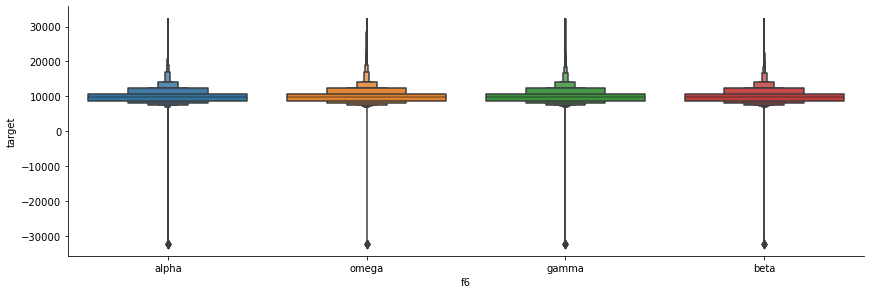

In [27]:
# Airline vs. price

sns.catplot(y = "target", x = "f6", data = df.sort_values("target", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

From the above graph, we can see that all airlines almost have the same business.


In [28]:
# As f6 airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["f6"]]
Airline = pd.get_dummies(Airline, drop_first= False)
Airline.head()

,f6_alpha,f6_beta,f6_gamma,f6_omega
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


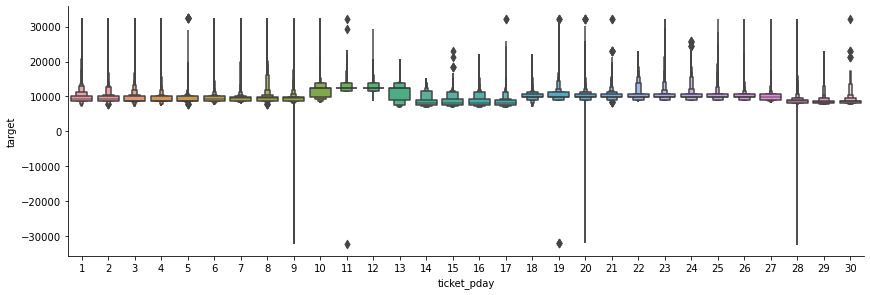

In [29]:
# Ticket Purchase day vs. price

sns.catplot(y = "target", x = "ticket_pday", data = df.sort_values("target", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

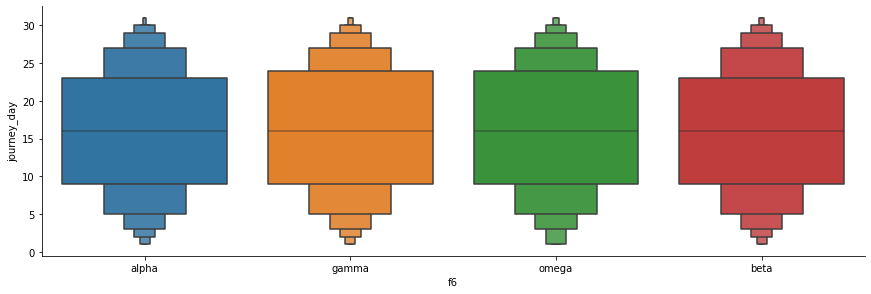

In [30]:
# Airline vs. Journey day

sns.catplot(y = "journey_day", x = "f6", data = df.sort_values("journey_day", ascending = False), kind="boxen", height = 4,aspect = 3)
plt.show()

In [31]:
# Concatenate dataframe --> df + Airline
df= pd.concat([df, Airline], axis = 1)


In [32]:
# dropping f6 airline column.
df = df.drop(['f6'], axis=1)

In [33]:
df.head()

,f8,f9,target,ticket_pday,ticket_pmonth,ticket_pyear,ticket_phour,ticket_pmin,journey_day,journey_month,journey_year,departure_hour,departure_min,arrival_hour,arrival_min,f6_alpha,f6_beta,f6_gamma,f6_omega
0,40,0,7400,1,9,2021,8,30,8,9,2021,11,0,12,55,0,1,0,0
1,40,0,8650,1,9,2021,8,30,8,9,2021,14,0,15,55,0,1,0,0
2,20,0,9150,1,9,2021,8,30,8,9,2021,5,0,6,55,0,1,0,0
3,20,2,10400,1,9,2021,8,30,8,9,2021,5,30,7,30,0,0,1,0
4,20,1,8697,1,9,2021,8,30,8,9,2021,5,30,7,30,0,0,1,0


# Feature selection

In [34]:
# taking sample of data for building model.
df_sample = df.sample(n=100000)
df_sample.head()

,f8,f9,target,ticket_pday,ticket_pmonth,ticket_pyear,ticket_phour,ticket_pmin,journey_day,journey_month,journey_year,departure_hour,departure_min,arrival_hour,arrival_min,f6_alpha,f6_beta,f6_gamma,f6_omega
3142237,20,1,10799,19,9,2021,7,45,23,9,2021,17,0,18,59,0,0,1,0
2379467,20,1,8890,14,9,2021,16,59,20,9,2021,4,0,6,0,1,0,0,0
2026694,20,1,12500,12,9,2021,17,46,19,9,2021,13,0,15,0,1,0,0,0
1974264,20,1,11504,12,9,2021,12,25,22,11,2021,4,40,6,40,0,0,0,1
2567209,20,1,8027,15,9,2021,17,55,25,9,2021,16,0,18,0,1,0,0,0


In [35]:
df.head()

,f8,f9,target,ticket_pday,ticket_pmonth,ticket_pyear,ticket_phour,ticket_pmin,journey_day,journey_month,journey_year,departure_hour,departure_min,arrival_hour,arrival_min,f6_alpha,f6_beta,f6_gamma,f6_omega
0,40,0,7400,1,9,2021,8,30,8,9,2021,11,0,12,55,0,1,0,0
1,40,0,8650,1,9,2021,8,30,8,9,2021,14,0,15,55,0,1,0,0
2,20,0,9150,1,9,2021,8,30,8,9,2021,5,0,6,55,0,1,0,0
3,20,2,10400,1,9,2021,8,30,8,9,2021,5,30,7,30,0,0,1,0
4,20,1,8697,1,9,2021,8,30,8,9,2021,5,30,7,30,0,0,1,0


Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. **heatmap**
2. **feature_importance_**
3. **SelectKBest**

In [36]:
# extracting X feature dataset 
X = df_sample.loc[:, ['f8', 'f9', 'ticket_pday', 'ticket_pmonth',
       'ticket_pyear', 'ticket_phour', 'ticket_pmin', 'journey_day',
       'journey_month', 'journey_year', 'departure_hour', 'departure_min',
       'arrival_hour', 'arrival_min', 'f6_alpha', 'f6_beta', 'f6_gamma', 'f6_omega']]
X.head()

,f8,f9,ticket_pday,ticket_pmonth,ticket_pyear,ticket_phour,ticket_pmin,journey_day,journey_month,journey_year,departure_hour,departure_min,arrival_hour,arrival_min,f6_alpha,f6_beta,f6_gamma,f6_omega
3142237,20,1,19,9,2021,7,45,23,9,2021,17,0,18,59,0,0,1,0
2379467,20,1,14,9,2021,16,59,20,9,2021,4,0,6,0,1,0,0,0
2026694,20,1,12,9,2021,17,46,19,9,2021,13,0,15,0,1,0,0,0
1974264,20,1,12,9,2021,12,25,22,11,2021,4,40,6,40,0,0,0,1
2567209,20,1,15,9,2021,17,55,25,9,2021,16,0,18,0,1,0,0,0


In [37]:
X.shape

(100000, 18)

In [38]:
# extracting Y target dataset 
y = df_sample.iloc[:, 2]
y.head()

3142237    10799
2379467     8890
2026694    12500
1974264    11504
2567209     8027
Name: target, dtype: int16

In [39]:
y.shape

(100000,)

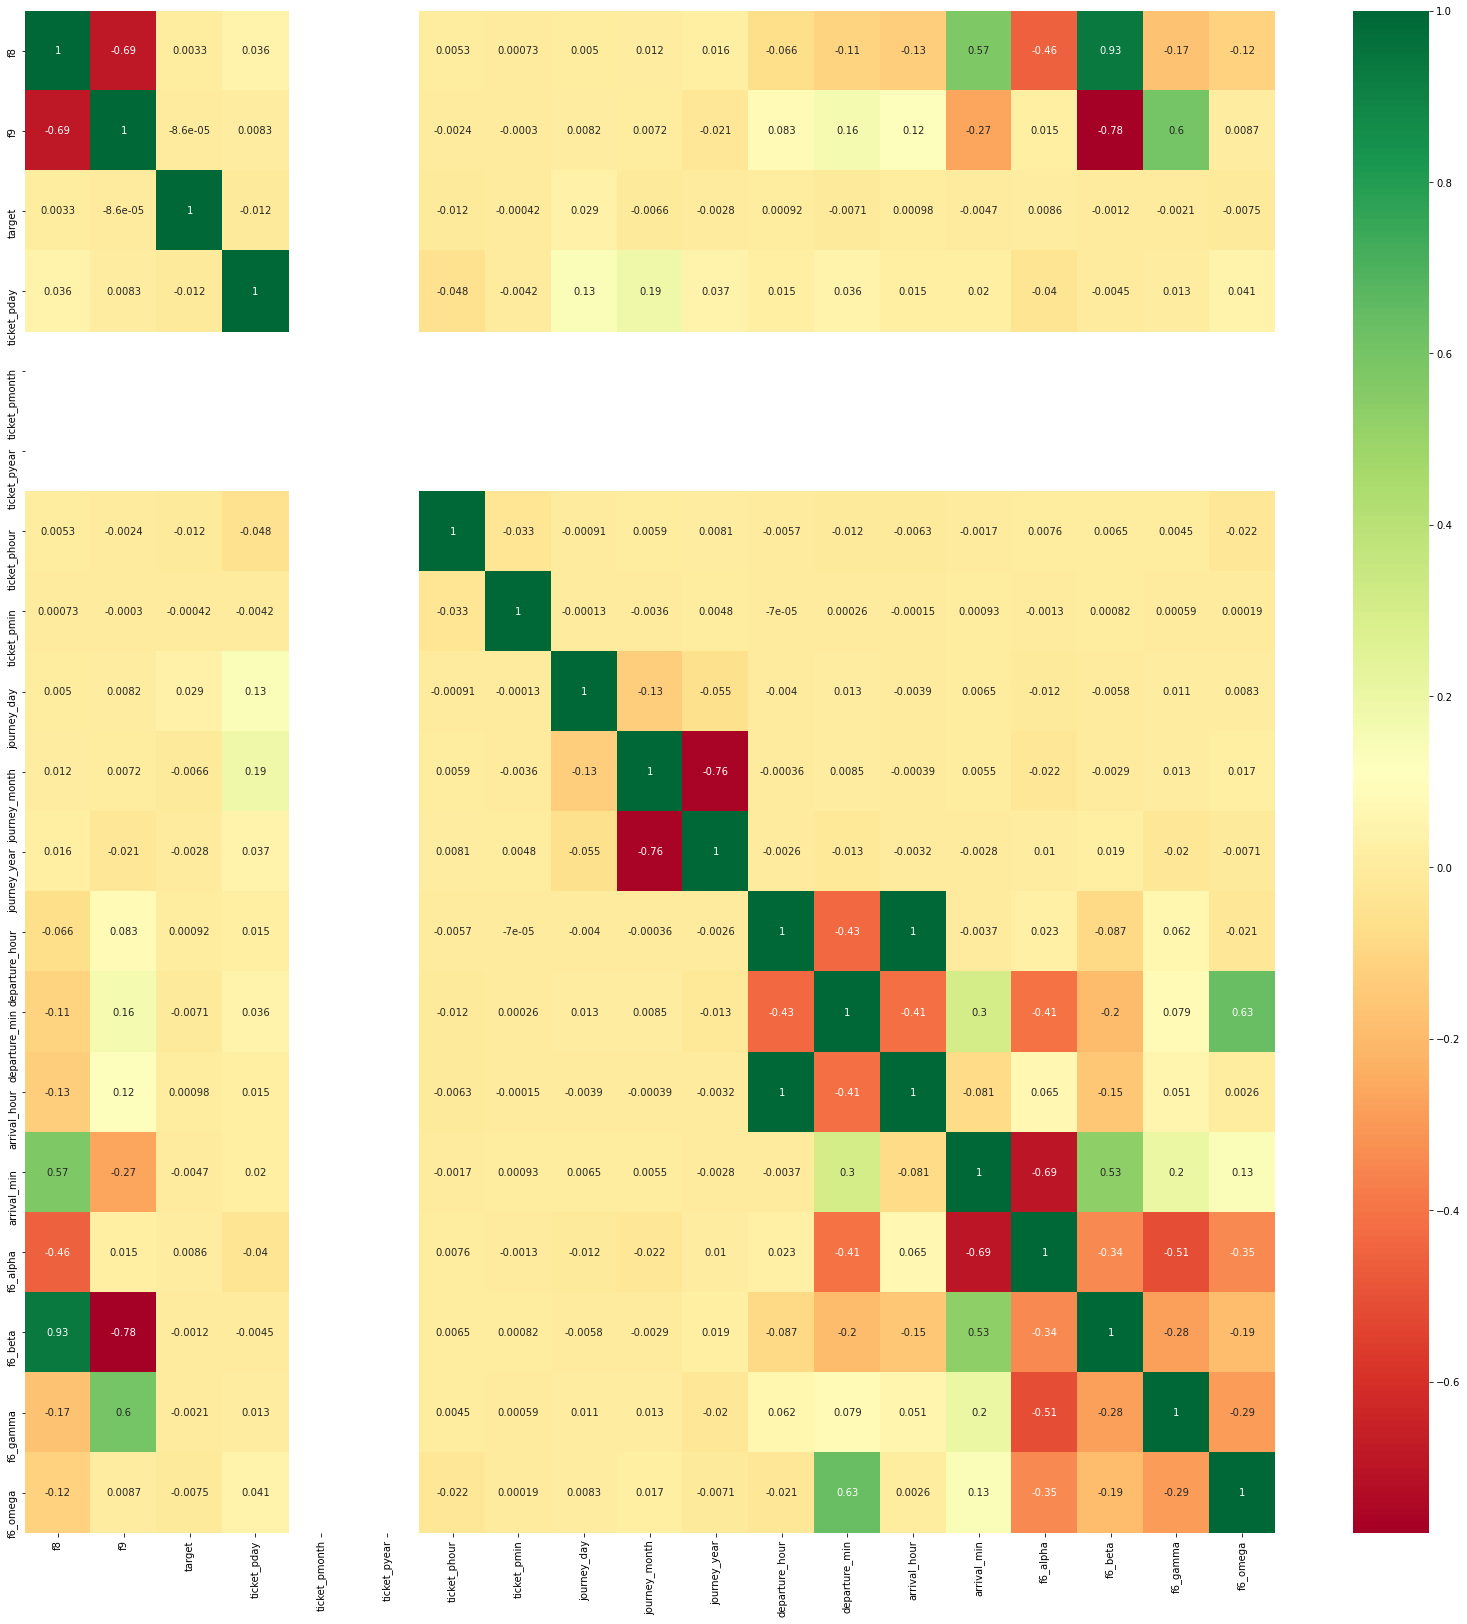

In [40]:
# Finds correlation between Independent and dependent attributes from complete dataset
 
plt.figure(figsize = (28,28))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()


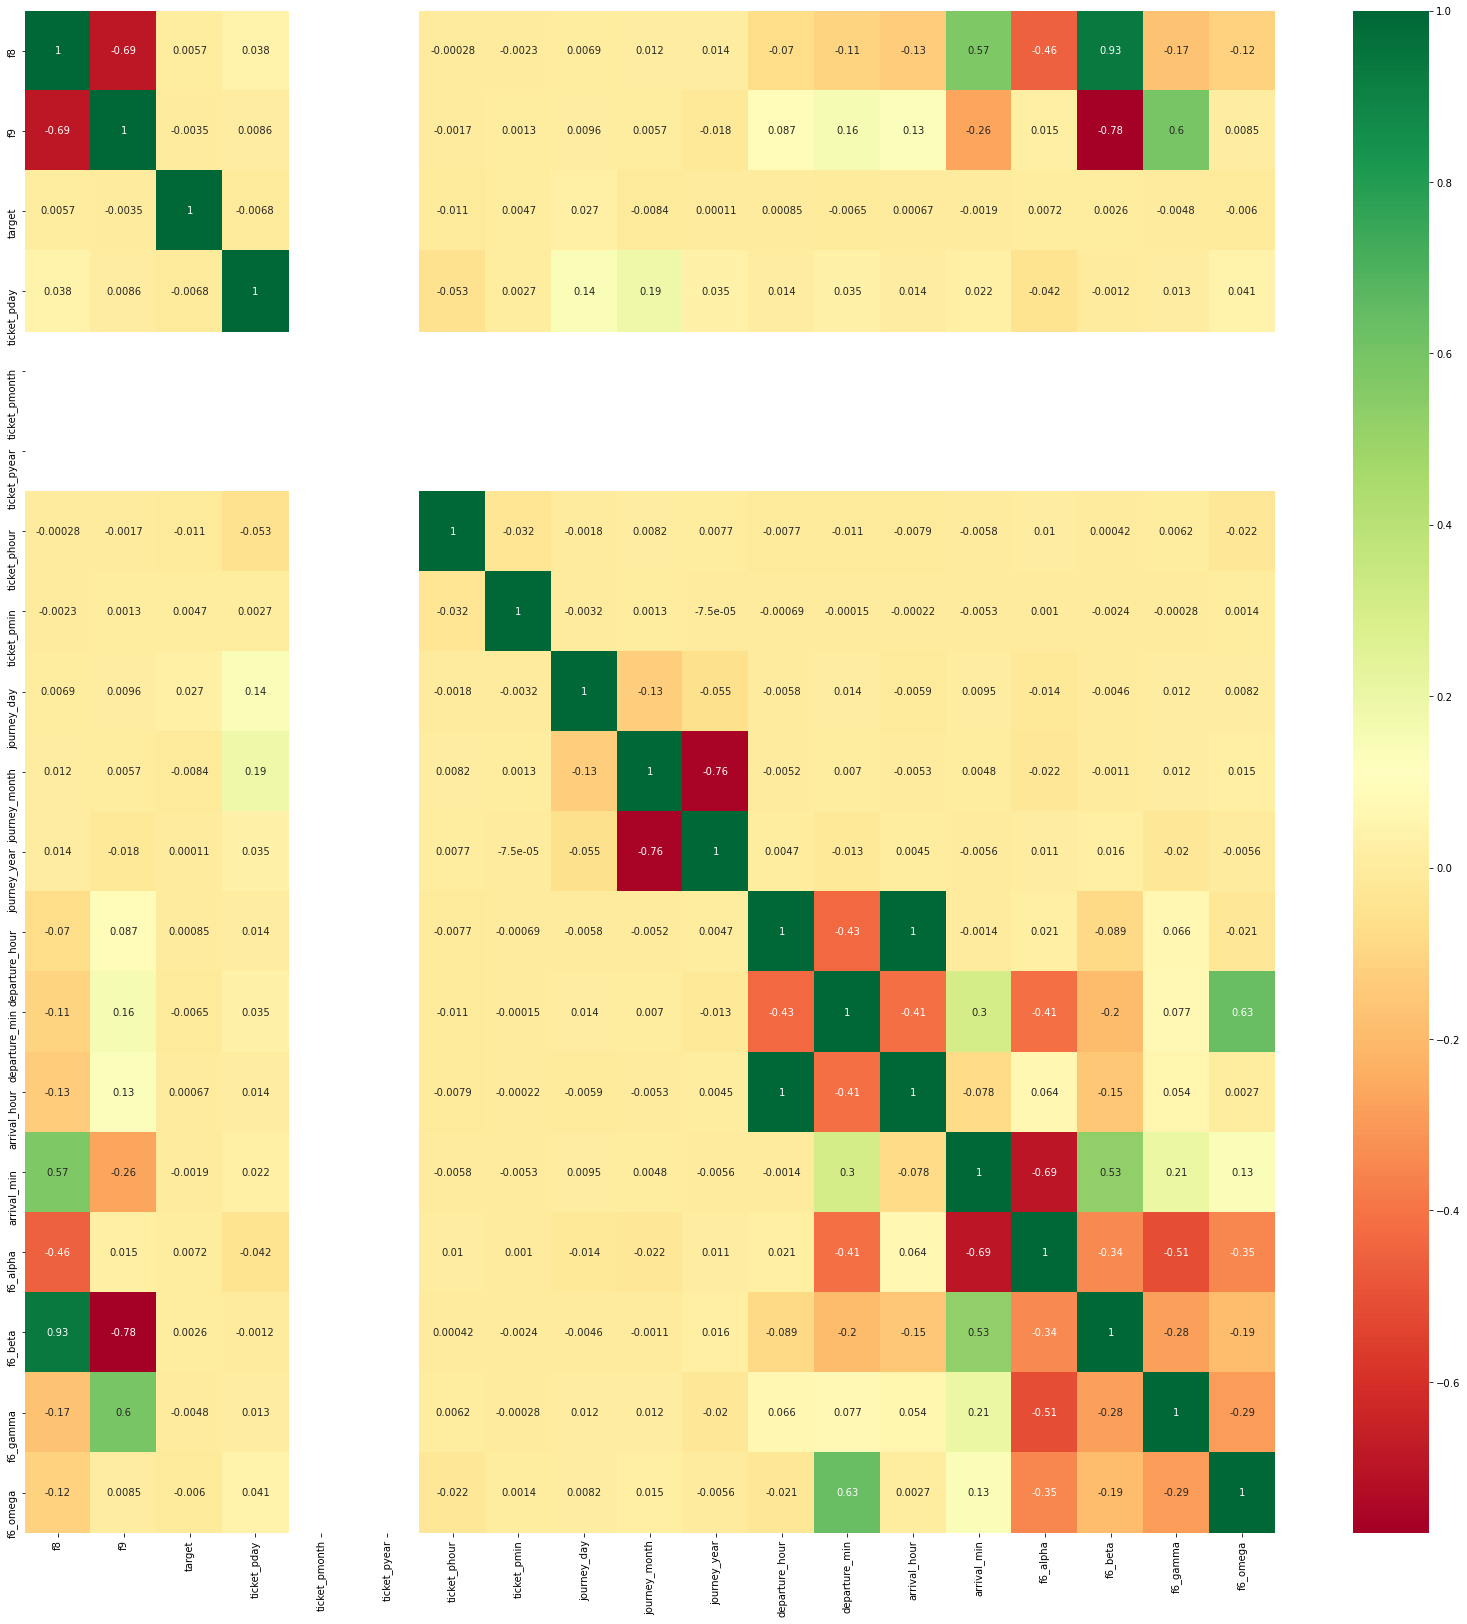

In [41]:
# Finds correlation between Independent and dependent attributes from sample dataset

plt.figure(figsize = (28,28))
sns.heatmap(df_sample.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [42]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [43]:
print(selection.feature_importances_)

[0.01720203 0.01422031 0.37491689 0.         0.         0.1654285
 0.16641816 0.13243872 0.03535067 0.00147162 0.02660627 0.00938987
 0.02663183 0.01196714 0.00539228 0.00290362 0.00539495 0.00426713]


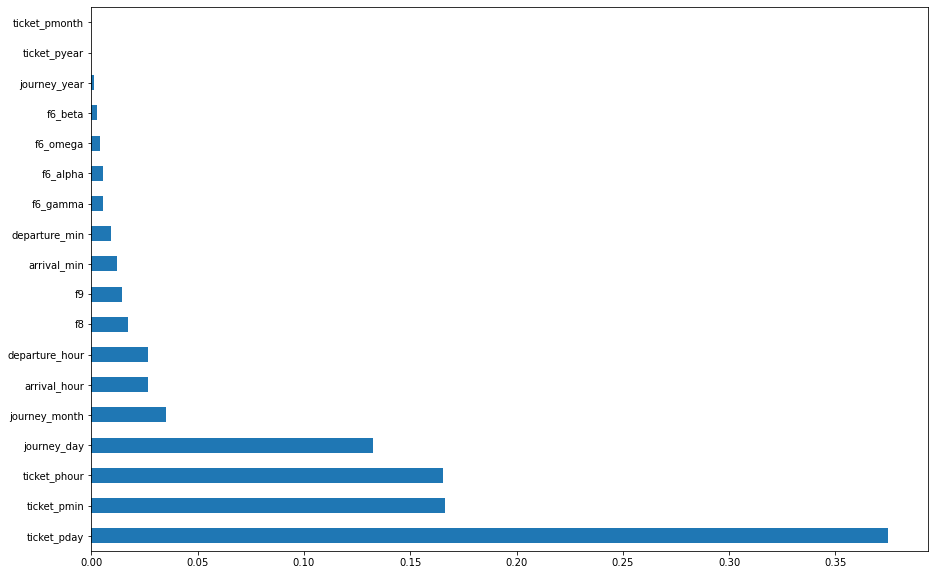

In [44]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (15,10))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

This shows that ticket purchase day is the most important feature of all. Other important features are ticket purchase minute, hour and jounrey day. Rest have very little to no relevance with respect to ticket price.

### Fitting model using Random Forest
1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
3. Scaling is not done in Random forest
4. Import model
5. Fit the data
6. Predict w.r.t X_test
7. In regression check RSME Score
8. Plot graph

In [45]:
# splitting into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [46]:
# importing library, creating and fitting model for training data
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
# predicting price for the testing data
y_pred = reg_rf.predict(X_test)
y_pred, y_test

(array([10480.51,  9480.53,  9865.88, ..., 10178.93, 12530.97, 11053.21]),
 3257074     9030
 1228575     8739
 3093538    10799
 2272511    12500
 1980160    11504
            ...  
 58547      10227
 1488088     9799
 4218868     9798
 1756301    11452
 3196129    10799
 Name: target, Length: 20000, dtype: int16)

In [48]:
# calculating random forest regression score for training data
reg_rf.score(X_train, y_train)

0.9095920396919421

In [49]:
# calculating random forest regression score for test data
reg_rf.score(X_test, y_test)


0.3562503961949063

C:\Users\jackay.lohano\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


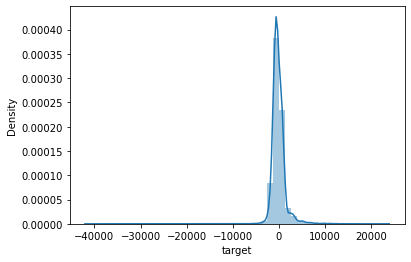

In [50]:
sns.distplot(y_test-y_pred)
plt.show()

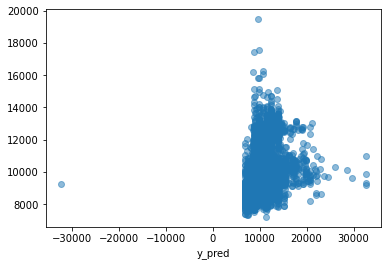

In [51]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.xlabel("y_pred")
plt.show()

In [52]:
from sklearn import metrics

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 948.6508713392858
MSE: 2214779.4804356927
RMSE: 1488.2135197731852


In [58]:
print("R2 score:", metrics.r2_score(y_test, y_pred))

R2 score: 0.3562503961949063


### Saving prediction file with one column without header

In [60]:
type(y_pred)

numpy.ndarray

In [61]:
df_pred = pd.DataFrame(y_pred)

In [62]:
type(df_pred)

pandas.core.frame.DataFrame

In [63]:
df_pred.shape

(20000, 1)

In [64]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20000 non-null  float64
dtypes: float64(1)
memory usage: 156.4 KB


In [66]:
df_pred.tail()

,0
19995,9589.42
19996,9957.65
19997,10178.93
19998,12530.97
19999,11053.21


In [70]:
predicted_file = df_pred.to_csv("pred_file.csv", index=False, header=False)